In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# **Wt**

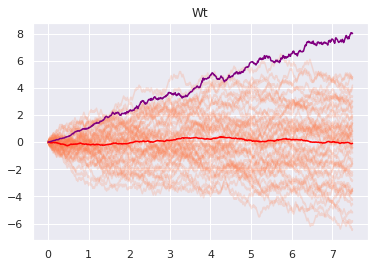

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Definimos nuestra función
def Wt(n,m,t):
  dt = 1/n
  dx = np.sqrt(dt)
  #Construímos una matrix de tamaño piso(n/t) +1 filas y m columnas
  k = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  #Construímos un vector dividido en piso(nt) + 1 intervalos de igual longitud, para graficar las trayectorias
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  #Construimos objetos para graficar
  # fig, ax = plt.subplots()
  #En el ciclo se calculan las m trayectorias
  for i in range(m):
    #Cada iteración acumula la suma de un vector que genera números aleatorios 1 ó -1, con probabiliad 0.5 cada uno
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t)), p = [0.5,0.5] ))
    #Graficamos la trayectoria
    sns.lineplot(x = tiempos,y = k[:,i], alpha = 0.2,color = 'coral')
  #Calculamos y graficamos la media de las trayecotrias para cada tiempo
  media_sim = np.mean(k, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red')
  #Calculamos y graficamos la varianza de las trayecotrias para cada tiempo
  desv_sim = np.var(k, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple')
  plt.title('Wt')
  plt.show()
Wt(100,50,7.5)


# **Ejercicio 1**
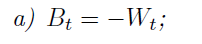

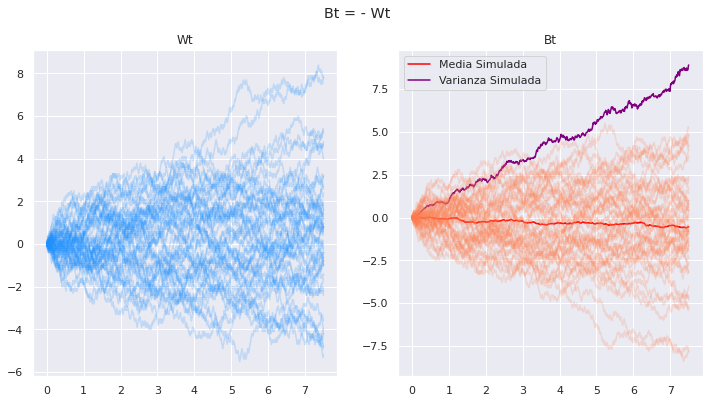

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.color_palette("rocket")
def Bt_1(n,m,t):
  dt = 1/n
  dx = np.sqrt(dt)
  k = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  B = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])

  for i in range(m):
    #Cada iteración acumula la suma de un vector que genera números aleatorios 1 ó -1, con probabiliad 0.5 cada uno
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t)), p = [0.5,0.5] ))
    sns.lineplot(x = tiempos,y = k[:,i], alpha = 0.2,color = 'dodgerblue', ax = ax1)

  media_sim = np.mean(- k, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = "Media Simulada")
  desv_sim = np.var(- k, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label="Varianza Simulada")
  # plt.legend(labels=["Media Simulada","Varianza Simulada"])
  for i in range(m):
    sns.lineplot(x = tiempos, y = - k[:,i], ax = ax2, color = 'coral', alpha = 0.2)

  fig.suptitle('Bt = - Wt')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  # plt.show()

# Llamamos a la función para graficar
Bt_1(100,50,7.5)

# **Ejercicio 2**
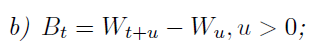

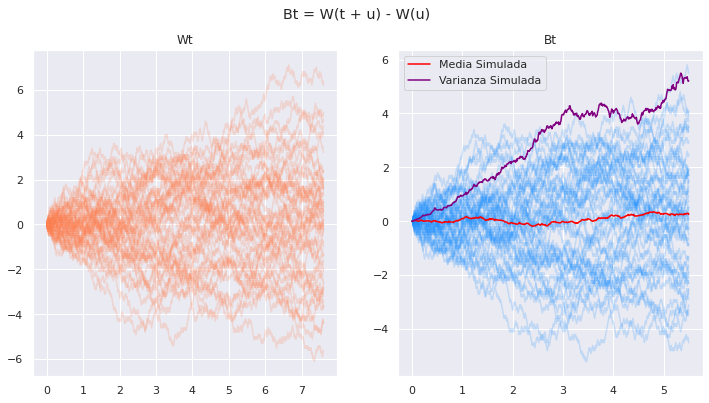

In [8]:
sns.set_theme()
def Bt_2(n, m, t, u):
  dt = 1/n
  dx = np.sqrt(dt)
  B = np.zeros(shape = [int(np.floor(n*t)) + 1, m  ])
  k = np.zeros(shape = [int(np.floor(n*(t + u))) + 1, m])

  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])
  # Calculamos el proceso de Wiener, una trayectoria en cada iteración del ciclo For
  tiempos_2 = np.arange(0, int(np.floor(n*(t+u))+ 1), step = 1) * dt
  for i in range(m):
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*(t+u))), p = [0.5,0.5] )) 
    sns.lineplot(x = tiempos_2,y = k[:,i], alpha = 0.2,color = 'coral', ax = ax1)

  #Llenamos la matriz Bt, iterando sobre la matriz del proceso de Wiener, tomando en cada iteración el u-esimo término
  for j in range(m):
    for i in range(int(np.floor(n*t))):
      B[i+1,j] = k[int(np.floor(i+u)) ,j] - k[int(np.floor(u)),j]
    #Graficamos las trayectorias
    sns.lineplot(x = tiempos,y = B[:,j], alpha = 0.2,color = 'dodgerblue', ax = ax2)

  #Calculamos y graficamos la media de las trayecotrias para cada tiempo
  media_sim = np.mean(B, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = 'Media Simulada')
  desv_sim = np.var(B, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label = 'Varianza Simulada')
  fig.suptitle('Bt = W(t + u) - W(u)')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
Bt_2(100, 50, 5.5, 2.1)

# **Ejercicio 3**
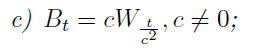

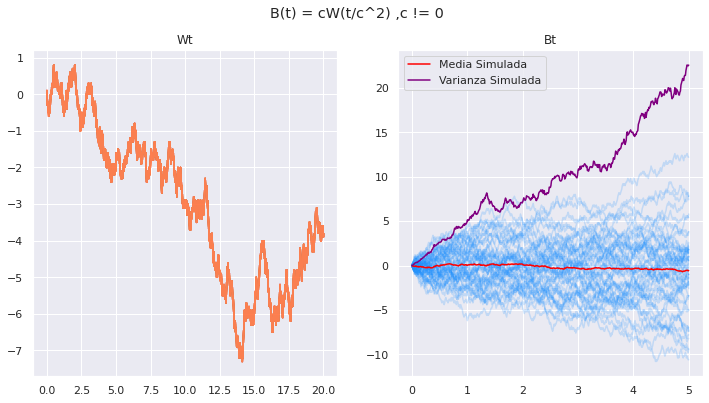

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
def Bt_3(n,m,t,c):
  dt = 1/n
  dx = np.sqrt(dt)
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  B = np.zeros(shape = [int(np.floor(n*t)) + 1, m])

  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])
  # Verificamos el valor absoluto de C, para hacer los cálculos del proceso Bt
  if abs(c) > 1:
    #Si |c| > 1, calculamos una matriz K de tamaño piso(ntc^2) + 1 filas y m colimnas
    k = np.zeros(shape = [int(np.floor(n*t*c**2)) + 1, m])
    for i in range(m):
      #Calculamos el proceso de Wiener y lo guardamos en K
      k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t*c**2)), p = [0.5,0.5] ))
      #En el ciclo llenamos cada entrada de la matriz B, tomando la i-ésima/c^2 * piso(nt) entrada del vector tiempos y la columna J
    for j in range(m):
      for i in range(1, int(np.floor(n*t)) + 1 ):
        B[i,j] = c*k[int(tiempos[i]/(c**2)*(np.floor(n*t))),j]
      sns.lineplot(x = tiempos,y = B[:,j], alpha = 0.2,color = 'dodgerblue', ax = ax2)
    tiempos_2 = np.arange(0, int(np.floor(n*t*c**2)) + 1, step = 1) * dt
    for i in range(m):
      sns.lineplot(x = tiempos_2, y = k[:,j], color = 'coral', alpha = 0.2, ax = ax1)

  else:
    #en el caso de que |c| <= 1 calculamos una matriz de piso ntc^2 filas y m columnas
    k = np.zeros(shape = [int(np.floor(n*t/(c**2))) + 1, m])
    tiempos_2 = np.arange(0, int(np.floor(n*t/(c**2))) +  1, step = 1) * dt
    for i in range(m):
      # Calulamos la matriz K para llenar generar trayectorias del procceso de wiener
      k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t/(c**2))), p = [0.5,0.5] ))
      sns.lineplot(x = tiempos_2, y = k[: , i], color = 'dodgerblue', alpha = 0.2, ax = ax1)
      
      #En el ciclo llenamos cada entrada de la matriz B, tomando la i-ésima/c^2 * piso(nt) entrada del vector tiempos y la columna J
    for j in range(m):
      for i in range(1, int(np.floor(n*t)) + 1 ):
        B[i,j] = c*k[int(tiempos[i]/(c**2)*(np.floor(n))),j]
        #Graficamos las trayectorias
      sns.lineplot(x = tiempos,y = B[:,j], alpha = 0.2,color = 'darkcyan', ax = ax2)

  media_sim = np.mean(B, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label ='Media Simulada')
  desv_sim = np.var(B, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label='Varianza Simulada')
  fig.suptitle('B(t) = cW(t/c^2) ,c != 0')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()

Bt_3(100,50,5,2)

# **Ejercicio 4**
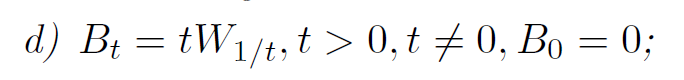


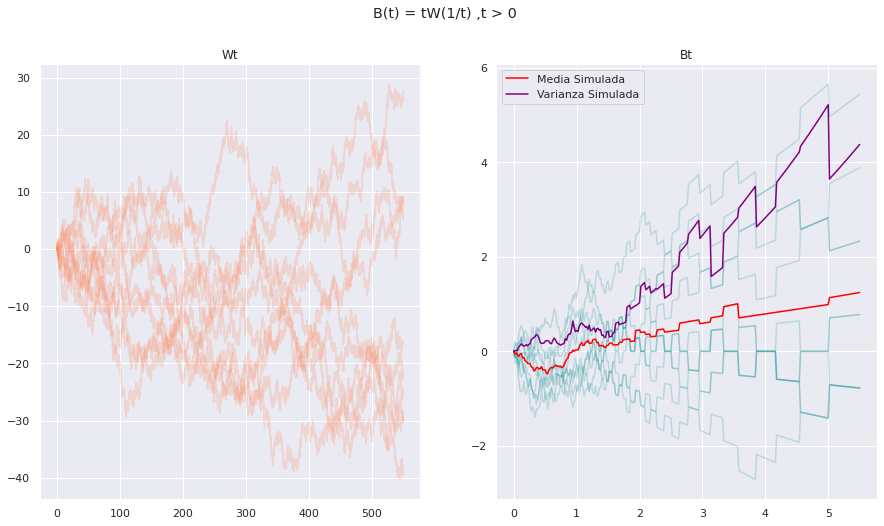

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# Definimos nuestra función
def Bt_4(n,m,t):
  dt = 1/n
  dx = np.sqrt(dt)
  
  #Construímos un vector dividido en piso(nt) + 1 intervalos de igual longitud, para graficar las trayectorias
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  #Construímos una matriz de tamaño piso(nt) + 1 filas y m columnas para el proceso de Wiener
  B = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  #Construímos una matriz de tamaño piso(nt * 100) + 1 filas y m columnas para el proceso Bt
  k = np.zeros(shape = [int(np.floor(n*t)*100) + 1, m])
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,8])
  #Generamos trayectorias del proceso de Wiener y lo guardamos en K
  tiempos_2 = np.arange(0,  int(np.floor(n*t)*100) +1, step = 1) * dt
  for i in range(m):
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t)*100), p = [0.5,0.5] ))
    sns.lineplot(x = tiempos_2, y = k[:, i], ax = ax1, color = 'coral', alpha = 0.2 )
  #En este ciclo llenamos cada entrada de la matriz K, donde multiplicamos la iésima entrada del vector tiempos, y lo multimplicamos por la 1/iésima * n entrada de Tiempos
  # de la columna J
  for j in range(m):
    for i in range(1, int(np.floor(n*t)) + 1):
      B[i,j] = tiempos[i]*k[int(1/tiempos[i] * n), j] 
      #Graficamos caaa trayectoria
    sns.lineplot(x = tiempos,y = B[:,j], alpha = 0.2,color = 'darkcyan', ax = ax2)

    #Calculamos y graficamos la media de las trayecotrias para cada tiempo
  media_sim = np.mean(B, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = 'Media Simulada')
    #Calculamos y graficamos la varianza de las trayecotrias para cada tiempo
  desv_sim = np.var(B, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label = 'Varianza Simulada')
  fig.suptitle('B(t) = tW(1/t) ,t > 0')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
Bt_4(50,10,5.5)


# **Ejercicio 5**

image.png

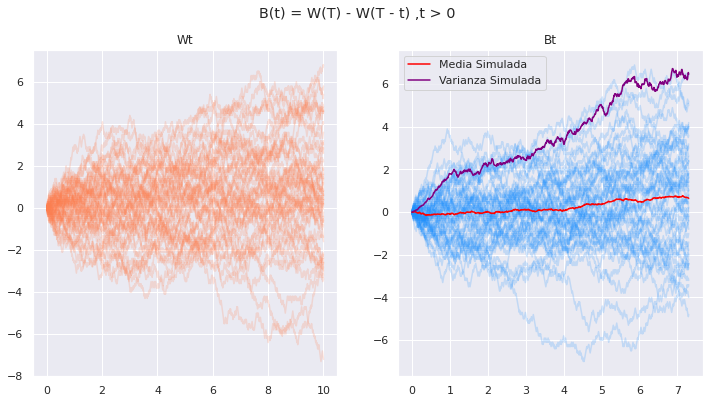

In [ ]:
sns.set_theme()
np.random.seed(123)
#Definimos nuestra función
def Bt_5(n,m, t, T):
  dt = 1/n
  dx = np.sqrt(dt)
  #Declaramos nuestra matriz de tamaño ( piso( n * T ) + 1, m ) donde obtendremos nuestros Wt
  k = np.zeros(shape = [int(np.floor(n*T)) + 1, m])
  #Declaramos nuestra matriz de tamaño ( piso( n * t ) + 1, m) donde obtendremos nuestros Bt
  B = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  tiempos_2 = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])

  #Elaboramos nuestros Wt para introducirlos en la matriz anteriormente declarada
  tiempos = np.arange(0,int(np.floor(n*T)) + 1, step = 1) * dt
  for i in range(m):
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*T)), p = [0.5,0.5] ))
    sns.lineplot(x=tiempos, y = k[:,i], ax = ax1, color = 'coral', alpha = 0.2)
  #Elaboramos nuestros Bt con dos ciclos for para que pueda restar los valores de t
  for j in range(m):
    for i in range(1,int(np.floor(n*t)+1)):
      B[i,j] = k[-1,j] - k[-1 - int(tiempos[i]*n), j]
    #Vamos graficando cada trayectoria en la gráfica
    sns.lineplot(x = tiempos_2,y = B[:,j], alpha = 0.2,color = 'dodgerblue', ax = ax2)

  media_sim = np.mean(B, axis = 1)
  sns.lineplot(x = tiempos_2, y = media_sim,color = 'red', ax = ax2, label='Media Simulada')
  desv_sim = np.var(B, axis = 1)
  sns.lineplot(x = tiempos_2, y = desv_sim,color = 'purple', ax = ax2, label='Varianza Simulada')
  fig.suptitle('B(t) = W(T) - W(T - t) ,t > 0')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
#Realizamos nuestra simulación
Bt_5(100,50,7.3,10)


# **Movimiento Browniano Geométrico**

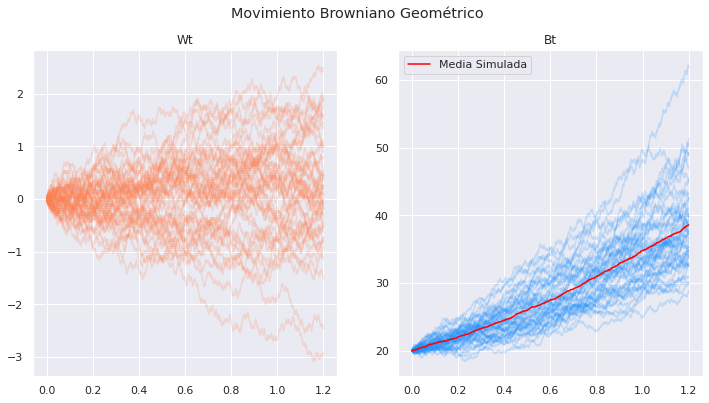

In [24]:
#Importamos las librerías que ocuparemos en el proceso
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Definimos la función con las variables que necesitamos
def MBG(n,m,t, miu, sigma, s0):
  dt = 1/n
  dx = np.sqrt(dt)
  #Declaramos nuestra matriz de tamaño ( piso( n * t ) + 1,m)
  k = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  W = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  #Elaboramos un vector de tiempos
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  #Se hace lo siguiente con el fin de asignarle un tamaño al gráfico y poder gráficar todas las trayectorias en una misma gráfica
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])

  #Asignamos valores a cada trayectoria para ingresarlos en la matriz
  for i in range(m):
    #El primer valor siempre será S0
    k[0,i] = s0
    #Usamos la fórmula vista en clase, multiplicamos por nuestro vector de tiempos para que vaya ascendiendo 
    k[1:, i] =s0 * np.exp( (miu - sigma**2 / 2) * tiempos[1:] + sigma*(np.cumsum(dx*np.random.choice([-1,1], size = int(np.floor(n*t)), p = [0.5,0.5] ))))
    W[1:, i] = np.cumsum(dx*np.random.choice([-1,1], size = int(np.floor(n*t)), p = [0.5,0.5] ))
    #Graficamos cada trayectoria
    sns.lineplot(x = tiempos,y = k[:,i], alpha = 0.2,color = 'dodgerblue', ax = ax2)
    sns.lineplot(x = tiempos,y = W[:,i], alpha = 0.2,color = 'coral', ax = ax1)
    
  #Obtenemos la media de cada tiempo y a continuación la graficamos
  media_sim = np.mean(k, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = 'Media Simulada')
  #Obtenemos la varianza de cada tiempo y a continuación la graficamos
  #Asignamos ciertas características a nuestra gráfica (título, etiquetas de eje)
  fig.suptitle('Movimiento Browniano Geométrico')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
#Realizamos nuestra simulación
MBG(500,50,1.2, 0.55, 0.15, 20)

# **Puente Browniano**

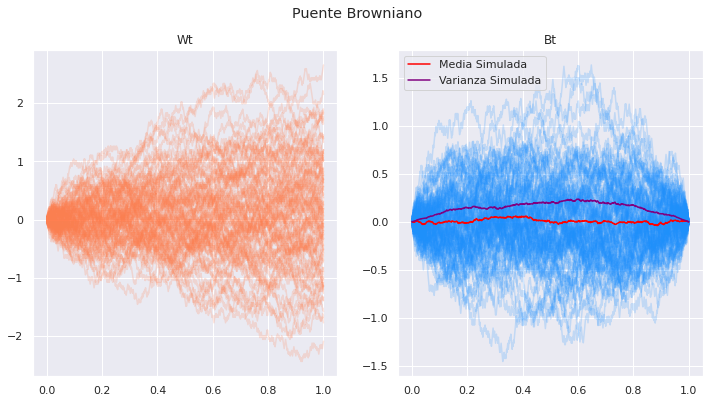

In [ ]:
#Importamos las librerías que ocuparemos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Definimos la función con las variables que necesitaremos
def PuenteBrowniano(n , m , t):
  dt = 1/n
  dx = np.sqrt(dt)
  #Declaramos nuestra matriz de tamaño ( n + 1 , m )
  k = np.zeros(shape = [n + 1, m])
  #Declaramos nuestra matriz para el puente browniano
  A = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  #Elaboramos nuestro vector de tiempos
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  #Se hace lo siguiente con el fin de asignarle un tamaño al gráfico y poder gráficar todas las trayectorias en una misma gráfica
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])

  #Elaboramos cada trayectoria para ingresarla en nuestra matriz

  for i in range(m):
    k[1:, i] = np.cumsum(dx * np.random.choice([-1,1], size = n, p = [0.5,0.5]) )
    sns.lineplot(x = tiempos,y = k[:,i], alpha = 0.2,color = 'coral', ax = ax1)

  #Vamos a correr dos ciclos for para ir llenando cada valor de cada trayectoria
  for j in range(m):
    for i in range(1 ,int(np.floor(n*t)) +1 ):
      #Usamos la fórmula del puente browniano para 0<=t<=1
      A[i,j] = k[i, j] - dt*i*k[-1,j] 
    #Graficamos cada trayectoria
    sns.lineplot(x = tiempos,y = A[:,j], alpha = 0.2,color = 'dodgerblue', ax = ax2)
  
  #Obtenemos la media de cada tiempo y a continuación la graficamos
  media_sim = np.mean(A, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = 'Media Simulada')
  #Obtenemos la varianza de cada tiempo y a continuación la graficamos
  desv_sim = np.var(A, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label = 'Varianza Simulada')
  #Asignamos ciertas características a nuestra gráfica (título, etiquetas de eje)
  fig.suptitle('Puente Browniano')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
#Realizamos nuestra simulación
PuenteBrowniano(1000,100,1)


# **Movimiento Broniano con reversion a la Media**

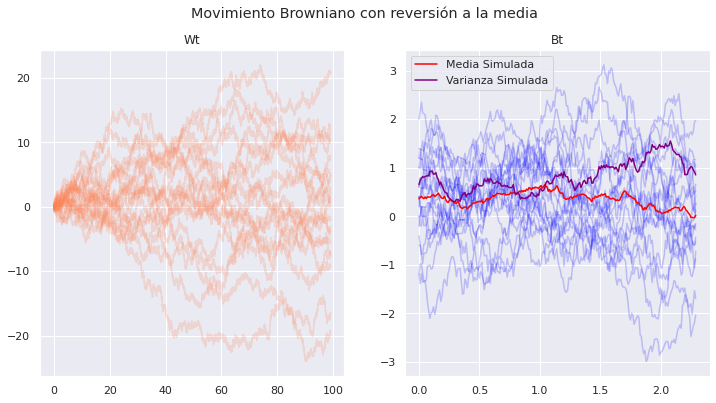

In [ ]:
#Importamos las librerías que ocuparemos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
#Declaramos nuestra función con las variables que necesitaremos
def MovBrownianoMedia_2(n,m,t):
  dt = 1/n
  dx = np.sqrt(dt)
  #Declaramos nuestra matriz de tamaño ( exp( 2 * t ) * n + 1, m )
  k = np.zeros(shape = [int(np.floor(np.exp(2*t)) * n) + 1, m])
  #Declaramos nuestra matriz Bt de tamaño ( piso( n * t ) + 1 , m )
  B = np.zeros(shape = [int(np.floor(t * n) + 1), m])
  #Elaboramos nuestro vector de tiempos
  tiempos  = np.arange(0, int(np.floor(t * n) + 1), step = 1) * dt

  #Se hace lo siguiente con el fin de asignarle un tamaño al gráfico y poder gráficar todas las trayectorias en una misma gráfica
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,6])
    
  
  #Elaboramos cada trayectoria para ingresarla en nuestra matriz k
  tiempos_2 = np.arange(0,int(np.floor(np.exp(2*t))*n)+ 1, step = 1) * dt
  for i in range(m):
      k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(np.exp(2*t))*n), p = [0.5,0.5] ))
      sns.lineplot(x = tiempos_2, y = k[:,i], alpha = 0.2, color = 'coral', ax = ax1)
  
  #Utilizamos dos ciclos for para ingresar cada valor en cada trayectoria, buscando los valores en la matriz k
  for j in range(m):    
      for i in range(int(np.floor(t * n) + 1 )):
          B[i,j] = np.exp(-tiempos[i]) * k[int(n * np.exp(2*tiempos[i])), j]
      sns.lineplot(x = tiempos,y = B[:,j], alpha = 0.2,color = 'blue', ax = ax2)
  
  #Obtenemos la media de cada tiempo y a continuación la graficamos
  media_sim = np.mean(B, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax2, label = 'Media Simulada')
  #Obtenemos la varianza de cada tiempo y a continuación la graficamos
  desv_sim = np.var(B, axis = 1)
  sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax2, label = 'Varianza Simulada')
  #Asignamos ciertas características a nuestra gráfica (título, etiquetas de eje)
  fig.suptitle('Movimiento Browniano con reversión a la media')
  ax1.set_title('Wt')
  ax2.set_title('Bt')
  plt.show()
#Realizamos nuestra simulación
MovBrownianoMedia_2(100, 20, 2.3)




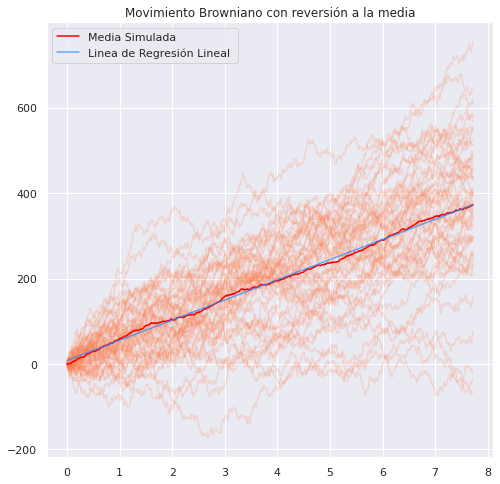

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
sns.set_theme()
def MovBrownianoMedia(n,m,t, miu, sigma):
  dt = 1/n
  dx = np.sqrt(dt)
  #Construímos una matrix de tamaño piso(n/t) +1 filas y m columnas
  k = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  #Construímos un vector dividido en piso(nt) + 1 intervalos de igual longitud, para graficar las trayectorias
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  #Construimos objetos para graficar
  fig, ax = plt.subplots(figsize = [8,8])
  #En el ciclo se calculan las m trayectorias
  for i in range(m):
    #Cada iteración acumula la suma de un vector que genera números aleatorios 1 ó -1, con probabiliad 0.5 cada uno
    k[1:, i] = np.cumsum(miu + sigma*  ss.norm.isf( np.random.uniform(size = int(np.floor(n*t)) ) , loc=0, scale=1) )
    #Graficamos la trayectoria
    sns.lineplot(x = tiempos,y = k[:,i], alpha = 0.2,color = 'coral', ax = ax)
  #Calculamos y graficamos la media de las trayecotrias para cada tiempo
  media_sim = np.mean(k, axis = 1)
  sns.lineplot(x = tiempos, y = media_sim,color = 'red', ax = ax, label = 'Media Simulada')

  #Calculamos la pendiente e intercepto que mejor se ajusta a la trayectoria Media Simulada
  slope, intercept = np.polyfit(tiempos, media_sim,1)
  x_1 = np.array([min(tiempos), max(tiempos)])
  y_1 = intercept + slope * x_1
  sns.lineplot(x = x_1, y = y_1, color = 'dodgerblue',ax = ax ,label = 'Linea de Regresión Lineal ', alpha = 0.7)
  #Calculamos y graficamos la varianza de las trayecotrias para cada tiempo
  desv_sim = np.var(k, axis = 1)
  # sns.lineplot(x = tiempos, y = desv_sim,color = 'purple', ax = ax)
  plt.title('Movimiento Browniano con reversión a la media')
  plt.show()

  # return k[:,8]
MovBrownianoMedia(100,50,7.72,0.5,5.3)

# **Movimiento Browniano en el Plano**

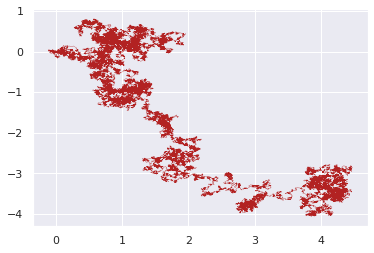

In [ ]:
def Wt(n,m,t):
  dt = 1/n
  dx = np.sqrt(dt)
  k = np.zeros(shape = [int(np.floor(n*t)) + 1, m])
  tiempos  = np.arange(0, np.floor(n*t) + 1, step = 1) * dt
  for i in range(m):
    k[1:, i] = np.cumsum(dx *  np.random.choice([-1,1], size = int(np.floor(n*t)), p = [0.5,0.5] ))
  return k

def Wiener2d(n,t):
  k = Wt(n, 2, t)
  plt.plot( k[ :, 0],k[:, 1], lw = 0.3, color = 'firebrick')
  plt.show()
Wiener2d(10000,5.5)


# **Movimiento Browniano en el Espacio**

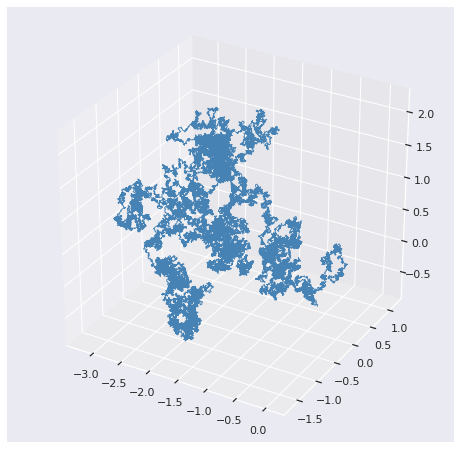

In [ ]:
from mpl_toolkits import mplot3d
def Wiener3d(n,t):
  fig = plt.figure(figsize = (8,8))
  ax = plt.axes(projection='3d')
  k = Wt(n, 3, t)
  ax.plot3D(k[ :, 0], k[:, 1], k[:, 2], 'steelblue', lw = 0.9)
  plt.show()
  # return k
Wiener3d(10000,5.5)